# Fit simple linear model using stochastic gradient descent

In [1]:
import itertools
import math
import numpy as np
import operator
import random

from matplotlib import pyplot as plt
%matplotlib inline

# Generate sample data

In [2]:
def g(x):
    return 7 * x + 2 + 10 * math.sin(x)

g = np.vectorize(g)

In [3]:
# Number of data points
N = 100

# Data
x = np.random.uniform(low=-9, high=9, size=N)

# Target
y = g(x)

In [4]:
# Linear model
def f(w, z):
    return np.dot(w.T, z)

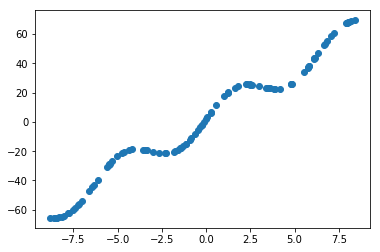

In [20]:
plt.plot(x, g(x), 'o')

## Error definition

In [7]:
# Shape data the right way so that intercept can be learned
z = np.array([x, [1] * N])

In [8]:
# Error committed by the model (relatively to the target) for a set of data points
def residual(w, z, y):
    return f(w, z) - y

In [9]:
# Loss function (sum of squared errors). Error committed by the model for all data points
def loss(w, z, y):
    r = residual(w, z, y)
    return np.dot(r, r.T)

**Goal:** Find `w` such that it minimizes `loss(w, z, y)`.

## Stochastic gradient descent algorithm

Elegantly expressed using `numpy`.

In [10]:
# Gradient of the loss function
def loss_gradient(w, z, y):
    return 2 * residual(w, z, y) * z

In [11]:
# Update rule
def update(w, z, y, lr):
    # `lr` stands for "learning rate"
    return w - lr * loss_gradient(w, z, y)

In [12]:
def sgd(z, y, initial_weights, lr):

    w = initial_weights
    N = z.shape[1]

    while True:

        # Stochastic part of the algorithm: choose a data point at random for this iteration
        i = random.randint(0, N - 1)

        w = update(w, z[:, i], y[i], lr)
        current_loss = loss(w, z, y)
        yield w, current_loss

## Run the algorithm

In [21]:
# Set learning rate
lr = 0.001

# Numbers of iterations
steps_nb = 100

# Initialize weights
w = np.array([-7, 2])

# Initialize algorithm

current_loss = 1
step = 0

loss_history = []
weights_history = []

gen = sgd(z, y, w, lr)

# Run algorithm

for step in range(1, steps_nb + 1):

    w, current_loss = next(gen)

    weights_history.append(w)
    loss_history.append(current_loss)

    # Pretty-printing ironically requires code that is not so pretty
    if step % 10 ** (len(str(step)) - 1) == 0 or step == steps_nb:
        print('step %s, loss = %.10f' % (str(step).zfill(len(str(steps_nb))), current_loss))

step 001, loss = 544686.7145800448
step 002, loss = 539778.9400510176
step 003, loss = 509154.8076771473
step 004, loss = 484142.8707305803
step 005, loss = 460536.6590692791
step 006, loss = 446245.3432527161
step 007, loss = 376913.8481755204
step 008, loss = 375153.9894633080
step 009, loss = 273317.3271328771
step 010, loss = 237050.1374571100
step 020, loss = 68690.7643988797
step 030, loss = 14374.4541296799
step 040, loss = 8038.1493045726
step 050, loss = 5077.8619136868
step 060, loss = 4652.3471387901
step 070, loss = 4804.8967191909
step 080, loss = 4956.3539412275
step 090, loss = 5162.4016985047
step 100, loss = 4612.4931115121


## Plot loss history

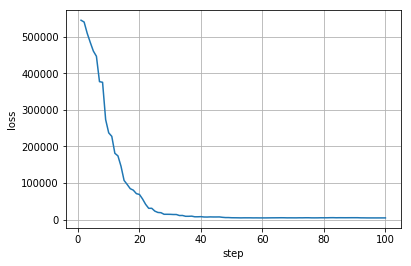

In [22]:
x_plot = list(range(1, len(loss_history) + 1))
y_plot = list(loss_history)

plt.plot(x_plot, y_plot)
plt.xlabel ('step')
plt.ylabel ('loss')
plt.grid()

plt.show()

## Visualize algorithm

In [23]:
# Plot model predictions against data.
# The model is linear: t -> w[0] * t + w[1].
def plot(w, x):
    
    # Plot data
    plt.plot(x, g(x), 'o')

    # Get data bounds
    x_min, x_max = min(x), max(x)
    x_range = x_max - x_min

    # Enlarge data bounds for prettier plotting
    x_min -= 0.05 * x_range
    x_max += 0.05 * x_range

    # Model predictions for data bounds
    y_min = f(w.T, np.array([x_min, 1]))
    y_max = f(w.T, np.array([x_max, 1]))

    # Plot model
    plt.plot([x_min, x_max], [y_min, y_max], 'r')

In [24]:
# Find a set of losses at which to display the progression of the algorithm

# Get loss bounds
loss_min, loss_max = min(loss_history), max(loss_history)
loss_range = loss_max - loss_min

# Split losses
selected_losses = [loss_max - r * loss_range for r in (0, 0.5, 0.75, 1)]
selected_losses = sorted(selected_losses, reverse=True)

selected_losses

[544686.7145800448, 274641.7510117548, 139619.26922760974, 4596.787443464738]

In [25]:
# Find a set of strictly increasing steps for which the loss is around `selected_losses`

selected_steps = []

i = 0
for step, current_loss in enumerate(loss_history):

    if current_loss <= selected_losses[i]:
        selected_steps.append(step + 1)
        i += 1

    if i >= len(selected_losses):
        break

# Float comparison is tricky. Make the step corresponding
# to the lowest loss has been selected. 
if len(selected_steps) < len(selected_losses):
    selected_steps.append(steps_nb - 1)

selected_steps

[1, 9, 15, 97]

step 1


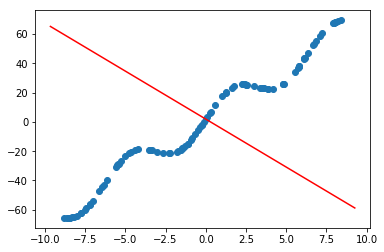

step 9


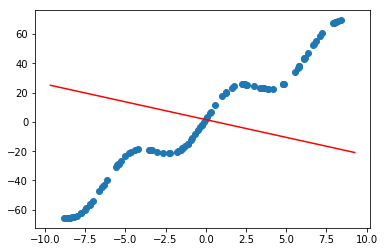

step 15


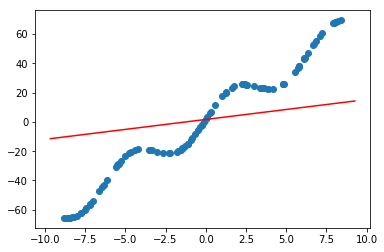

step 97


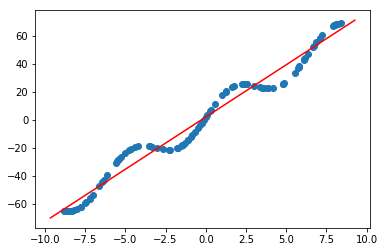

In [26]:
# Visualize
for step in selected_steps:
    print('step %i' % (step))
    plot(weights_history[step - 1], x)
    plt.show()

## Re-plot loss history

Highlight `selected_steps` this time

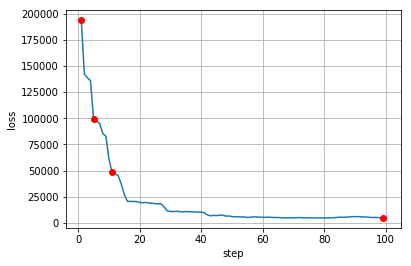

In [18]:
x_plot = list(range(1, len(loss_history) + 1))
y_plot = list(loss_history)

selected_losses = [loss_history[step - 1] for step in selected_steps]

plt.plot(x_plot, y_plot)
plt.plot(selected_steps, selected_losses, 'ro')

plt.xlabel ('step')
plt.ylabel ('loss')
plt.grid()

plt.show()

## Plot weights history

Highlight `selected_steps` as well

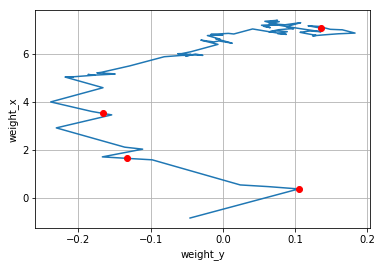

In [19]:
weights_y = list(map(operator.itemgetter(1), weights_history))
weights_x = list(map(operator.itemgetter(0), weights_history))

selected_weights_y = [weights_history[step][1] for step in selected_steps]
selected_weights_x = [weights_history[step][0] for step in selected_steps]

plt.plot(weights_y, weights_x)
plt.plot(selected_weights_y, selected_weights_x, 'ro')

plt.xlabel ('weight_y')
plt.ylabel ('weight_x')
plt.grid()

plt.show()

## References

https://en.wikipedia.org/wiki/Stochastic_gradient_descent